In [1]:
import numpy as np
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateFormatter, AutoDateLocator

from os.path import exists 

import gdown
import zipfile

### Data Loading

In [2]:
# Download the data if it doesn't exists locally already
def download_device_data(url:str, filename:str):
    file_exists = exists('../data/' + filename) 
    if file_exists==False:
        output = '../data/' + filename + '.zip'
        gdown.download(url, output, quiet=False, fuzzy=True)

        # Unzip the data 
        with zipfile.ZipFile(output, 'r') as zip_ref:
            zip_ref.extractall('../data/')
    return None

In [3]:
urls = ['https://drive.google.com/file/d/1QC6afqmWSHNpgsoe7j7g4E3YaYoHqeIt/view?usp=sharing', 
        'https://drive.google.com/file/d/1Y_m2Awl9161Rs-7xiXbQKV7NOsDI6DI5/view?usp=sharing', 
        'https://drive.google.com/file/d/1-mayhsGwpSnSHQYDRUDT2bY9EFSrrpOZ/view?usp=sharing',
        'https://drive.google.com/file/d/10USDOONYDPo8BAY46qhQOAPdpwnC1S4D/view?usp=sharing'
       ]
filenames = ['devices1.csv',
            'devices2.csv',
            'devices3.csv',
            'devices4.csv',
           ]
for url, filename in zip(urls, filenames):
    download_device_data(url, filename)

Downloading...
From: https://drive.google.com/uc?id=1QC6afqmWSHNpgsoe7j7g4E3YaYoHqeIt
To: /home/fielddata-user/data/devices1.csv.zip
100%|██████████| 63.8M/63.8M [00:05<00:00, 11.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Y_m2Awl9161Rs-7xiXbQKV7NOsDI6DI5
To: /home/fielddata-user/data/devices2.csv.zip
100%|██████████| 62.2M/62.2M [00:05<00:00, 11.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-mayhsGwpSnSHQYDRUDT2bY9EFSrrpOZ
To: /home/fielddata-user/data/devices3.csv.zip
100%|██████████| 62.5M/62.5M [00:06<00:00, 9.67MB/s]
Downloading...
From: https://drive.google.com/uc?id=10USDOONYDPo8BAY46qhQOAPdpwnC1S4D
To: /home/fielddata-user/data/devices4.csv.zip
100%|██████████| 64.8M/64.8M [00:10<00:00, 6.12MB/s]


In [4]:
# Example of how to load times series csv file
# Each file contains data from approximately 50 devices
ts_df = pd.read_csv('../data/devices1.csv')

#### Data Frame Columns

 `current_out`: current withdrawn from the box by the consumer <br>
 `current_in`: current supplied to the box from the solar panel <br>
 `current`: `current_out` - `current-in` --> net current that goes in or out of the battery <br>
 `temperature`: temperature in deg C <br>
 `timestamp`: YYYY-MM-DD HH:MM:SS <br>
 `panel_voltage`: voltage of the battery in V <br>
 `state_of_charge_percent`: state of charge of the battery in percent <br>
 `battery_id`: unique identifier of the battery <br>

In [5]:
ts_df.loc[ts_df["battery_id"]==0].loc[:1000,:]

,battery_voltage,current,current_in,current_out,panel_voltage,state_of_charge_percent,temperature,timestamp,usb_current,voltage,battery_id
0,7.090,-2.542,2.544,0.002,7.240,NaN,NaN,2021-03-02 06:33:24,0.002,7.185,0
1,7.100,-2.548,2.550,0.002,7.245,NaN,NaN,2021-03-02 06:35:24,0.002,7.190,0
2,7.095,-2.472,2.474,0.002,7.275,NaN,NaN,2021-03-02 06:37:24,0.002,7.215,0
3,7.070,-2.232,2.236,0.004,7.370,NaN,NaN,2021-03-02 06:39:24,0.002,7.290,0
4,7.075,-2.276,2.278,0.002,7.350,100.0,28.287938,2021-03-02 06:41:24,0.002,7.280,0
...,...,...,...,...,...,...,...,...,...,...,...
996,6.675,-0.192,0.200,0.008,6.680,NaN,NaN,2021-03-03 15:22:55,0.002,6.695,0
997,6.675,-0.182,0.190,0.008,6.675,54.0,24.479286,2021-03-03 15:23:52,0.002,6.695,0
998,6.675,-0.174,0.182,0.008,6.675,NaN,NaN,2021-03-03 15:25:46,0.002,6.695,0
999,6.670,-0.162,0.170,0.008,6.670,NaN,NaN,2021-03-03 15:27:46,0.002,6.690,0


### Plotting

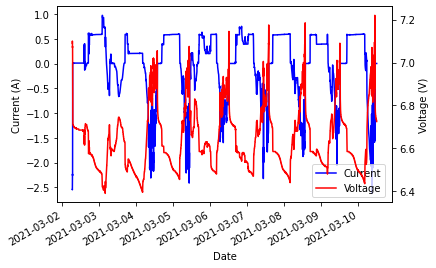

In [6]:
# Basic plot of the data

xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)

start_pidx = 0 
end_pidx = 6000 

dates = matplotlib.dates.date2num(ts_df.loc[ts_df["battery_id"]==0].loc[start_pidx:end_pidx, "timestamp"])
current = ts_df.loc[ts_df["battery_id"]==0].loc[start_pidx:end_pidx, "current"]
voltage = ts_df.loc[ts_df["battery_id"]==0].loc[start_pidx:end_pidx, "battery_voltage"]

fig, host = plt.subplots()
par1 = host.twinx()

p1, = host.plot(dates, current, 'b', label='Current')
p2, = par1.plot(dates, voltage, 'r', label='Voltage')

host.set_ylabel('Current (A)')
par1.set_ylabel('Voltage (V)')
host.set_xlabel('Date')

host.xaxis.set_major_locator(xtick_locator)
host.xaxis.set_major_formatter(xtick_formatter)
fig.autofmt_xdate()

lines = [p1, p2]
host.legend(lines, [l.get_label() for l in lines], loc=1, bbox_to_anchor=(0.995,0.22))
fig.show()